# **OpenAI Gym train an RL agent to drive a taxi and visualize the game**

In [1]:
import gym

In [2]:
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
env.reset()

401

In [4]:
!pip install IPython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00


In [5]:
!pip install pyvirtualdisplay


### 'Xvfb', indicates that the required virtual display server, Xvfb, is not installed on your system

In [6]:
!apt-get install -y xvfb


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [7]:
from pyvirtualdisplay import Display

# Create a virtual display (invisible and 400x300 size)
display = Display(visible=0, size=(400, 300))
display.start()


In [8]:
!python -m pip install pygame

In [9]:
import matplotlib.pyplot as plt


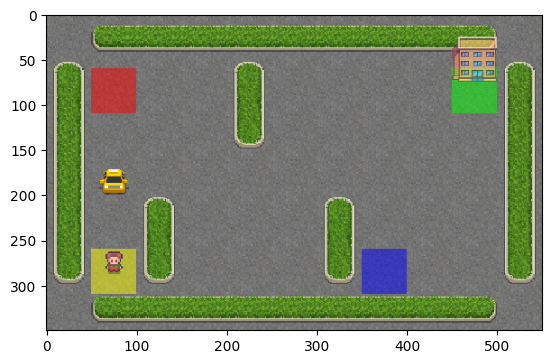

In [10]:
from IPython import display as ipythondisplay  # Fix typo: 'ipythondiplay' -> 'ipythondisplay'

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# range=episodes
for i in range(50):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    screen = env.render(mode='rgb_array')

    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())  # Corrected typo here

    if done:
        break

ipythondisplay.clear_output(wait=True)
env.close()


In [11]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state = env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state


Action Space Discrete(6)
State Space Discrete(500)
State: 328


In [12]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [13]:
env.s = 328
epochs = 0
penalties, rewards = 0, 0
frames = []
done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1

    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward,
    })

    epochs += 1

print("Time steps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))


Time steps taken: 2777
Penalties incurred: 845


In [14]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep:{i+1}")
    print(f"State:{frame['state']}")
    print(f"Action:{frame['action']}")
    print(f"Reward:{frame['action']}")
    sleep(.1)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep:2777
State:85
Action:5
Reward:5


In [15]:
import numpy as np
q_table=np.zeros([env.observation_space.n,env.action_space.n])

In [16]:
%%time
import random
import numpy as np
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):  # Corrected 'ranges' to 'range'
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0  # Set penalties to 0

    done = False
    while not done:
        # Exploration-exploitation tradeoff
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        # Q-learning formula
        next_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = next_value  # Update Q-table

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    # Print progress every 100 episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 100000
Training finished.

CPU times: user 1min 22s, sys: 7.59 s, total: 1min 30s
Wall time: 1min 28s


In [17]:
q_table[328]

array([ -2.40692473,  -2.27325184,  -2.40784936,  -2.36091654,
       -10.6051691 , -10.66684216])

In [18]:
total_epochs,total_penalties = 1,1
episodes = 100

for _ in range(episodes):
  state = env.reset()
  epochs, penalties, reward = 0, 1, 0

  done = False

  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info =env.step(action)

    if reward == -10:
      penalties +=1

      epochs +=1
    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs/episodes}")
print(f"Average penalties per episode: {total_penalties/episodes}")

Results after 100 episodes:
Average timesteps per episode: 0.01
Average penalties per episode: 13.22


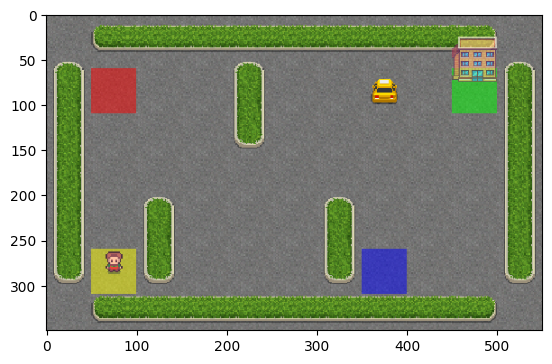

In [19]:
env.reset()
prev_screen =env.render(mode='rgb_array')
plt.imshow(prev_screen)

for _ in range(episodes):
  action = env.action_space.sample()
  state,penalty,done,info = env.step(action)
  screen=env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait=True)
  env.close()

  ipythondisplay.clear_output(wait=True)
  env.close()
